# Kaggle Study Day 22

# How Autoencoders Work : Intro and UseCases 

https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

# 1. Introduction

## 1.1. What are Autoencoders

Autoencoder는 출력이 입력과 동일한 특수한 유형의 인공신경망 구조다. Autoencoder는 입력 데이터의 아주 낮은 수준의 표현을 학습하기 위해 비지도방식으로 학습된다. 그런 다음 이러한 낮은 수준의 변수는 실제 데이터를 투영하기 위해 다시 변형된다. Autoencoder는 네트워크망을 통해 입력을 에측하는 회귀 작업이다(즉, identity 함수 모델링). 이런 네트워크망은 중간에 몇 뉴런의 병목현상이 있어, 디코더가 원래 입력을 재현하는 데 사용할 수 있는 저차원의 코드로 입력을 압축하는 효과적인 표현을 만들어야한다. 

일반적인 autoencoder 구조는 다음과 같은 세가지 주요 요소로 구성된다.
- Encoding Architecture : 인코더 구조는 노드 수가 감소하는 일련의 레이어로 구성되며 궁극적으로 latent view representation으로 감소한다.
- Latent View Representation : 잠재 뷰(latent view)는 입력이 감소하고 정보가 보존되는 가장 낮은 수준의 공간을 나타낸다.
- Decoding Architecture : 디코딩 구조는 인코딩 구조의 거울 이미지이지만, 모든 레이어의 노드 수가 증가하고 궁극적으로 (거의) 유사한 입력을 출력한다.

아주 미세하게 튜닝된 autoencoder 모델은 첫 레이어에서 전달된 동일한 입력을 재구성할 수 있어야한다. 이 커널에서 autoencoder 작업과 구현을 안내할 것이다. autoencoder는 이미지 데이터와 널리 사용되며 사용 예시는 다음과 같다.
- 차원 축소
- 이미지 압축
- 이미지 노이즈 제거
- 이미지 생성
- 변수 추출

## 1.2. How Autoencoders work

autoencoder에 숨겨진 수학을 이해해보자. autoencoder에 숨겨진 주요 아이디어는 고차원 데이터의 저차원 표현을 학습하는 것이다. 예시와 함께 인코딩 과정을 이해해보자. 데이터 표현 공간(데이터를 표현하는 데 사용되는 N 차원 공간)을 고려하고, x1과 x2 두 변수로 표현되는 데이터 포인트를 고려한다. 데이터 manifold는 실제 데이터가 있는 데이터 표현 공간의 내부 공간이다.

-- 내 설명 - 시온 -- <br>
Manifold란 고차원 데이터(예: (256, 256, 3) 크기의 이미지)가 있을 때 고차원 데이터를 데이터 공간에 뿌리면 sample들을 잘 아우르는 subspace가 있을 것이라는 가정에서 학습을 진행하는 방법. 이렇게 찾은 manifold는 데이터의 차원을 축소시킬 수 있다.

In [14]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
init_notebook_mode(connected=True)

# 랜덤 데이터 생성
N = 50
random_x = np.linspace(2,10,N)  ### linspace(start, stop, num)
random_y1 = np.linspace(2,10,N) ### start부터 stop까지 num개의 수열 생성
random_y2 = np.linspace(2,10,N)

trace1 = go.Scatter(x=random_x, y=random_y1, mode='markers', name='Actual Data')
trace2 = go.Scatter(x=random_x, y=random_y2, mode='lines', name='Model')
layout = go.Layout(title='2D Data Representation Space', xaxis=dict(title='x2', range=(0,12)), yaxis=dict(title='x1', range=(0,12)), height=400,
                  annotations=[dict(x=5,y=5,xref='x',yref='y',text='This 1D line is the Data Maniffold (where data resides)',
                                   showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                   ax=-120, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8)])
figure = go.Figure(data=[trace1], layout=layout)
iplot(figure)

이 데이터를 표현하기 위해 현재 X와 Y의 2차원을 사용하고 있다. 하지만 이 공간의 차원을 저차원(1D)으로 줄이는 게 가능하다.
- 선의 기준점 : A
- 수평축을 가진 각도 L

위의 두가지를 정의할 수 있으면, 선 A 위의 다른 점(B)은 A부터의 거리 'd'와 각도 L로 나타낼 수 있다.

In [16]:
random_y3 = [2 for i in range(100)]  # 100개의 2가 있는 리스트
random_y4 = random_y2 + 1
trace4 = go.Scatter(x=random_x[4:24], y=random_y4[4:300], mode='lines')
trace3 = go.Scatter(x=random_x, y=random_y3, mode='lines')
trace1 = go.Scatter(x=random_x, y=random_y1, mode='markers')
trace2 = go.Scatter(x=random_x, y=random_y2, mode='lines')

layout = go.Layout(xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="2D Data Repersentation Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data=data, layout=layout)
iplot(figure)


###################

random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="Latent Distance View Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

하지만 여기서 중요한 질문은 어떤 로직이나 규칙으로 점 B가 A와 각도 L의 조건에서 표현될 수 있냐는 것이다. 혹은 다른 말로, B, A, L의 방정식은 무엇인가이다. 답은 간단하다. 고정된 방정식은 없지만 비지도학습 과정에 의해 최적의 방정식이 얻어진다. 간단히 말하면, 학습 과정은 B를 A와 L의 형태로 변환하는 규칙/방정식으로 정의될 수 있다. autoencoder의 관점에서 이 과정을 이해해보자.

은닉층이 없는 autoencoder를 고려해보자. 입력 x1와 x2는 나중에 x1과 x2로 투영되는 저차원 표현 d로 인코딩된다.

### Step1 : Represent the points in Latent View Space

데이터 표현 공간에서 점 A와 B의 좌표가 
- point A : (x1A, x2B)
- point B : (x1B, x2B)

라면, latent view space에서 이들의 좌표는 다음과 같다. <br>
(x1A, x2A) ---> (0, 0) <br>
(x1B, x2B) ---> (u1B, u2B)
- point A : (0,0)
- point B : (u1B, u2B)

여기서 u1B와 u2B는 점과 기준점 사이의 거리 형태로 표현될 수 있다.<br>
u1B = x1B - x1A <br>
u2B = x2B - x2A

### Step 2: Represent the points with distance d and angle L

이제 u1B와 u2B는 거리 d와 각도 L의 조합으로 표현될 수 있다. 이것을 각도 L, 수평축으로 돌리면, L은 0, 즉, 아래와 같다.<br>
=> (d, L) <br>
=> (d, 0) (after rotation)

이것은 인코딩 과정의 출력이며 저차원으로 데이터를 나타낸다. 모든 레이어의 가중치와 편향(bias)를 가진 신경망의 기본 방정식을 recall한다면, 다음과 같다. <br>
=> (d, 0) = W.(u1B, u2B)
==> (encoding)

W는 은닉층의 가중치행렬이다. 이로 인해 디코딩 과정이 인코딩 과정의 거울이미지라는 것을 알 수 있다. <br>
=> (u1B, u2B) = Inverse(W).(d, 0) <br>
==> (decoding)

데이터 (x1, x2)의 축소된 형태는 인코딩 구조에서 얻은 latent view space의 (d, 0)이다. 마찬가지로, 디코딩 구조는 이 표현을 원래 형식 (u1B, u2B)로 변환한 다음 (x1, x2)로 변환한다. 중요한 점은 규칙 / 학습 함수 / 인코딩-디코딩 방정식이 다양한 데이터타입에 따라 다르다는 것이다. 예를 들어, 2차원 공간에서 다음 데이터를 고려해보자.

#### Different Rules for Different Data

모든 데이터타입에 동일한 규칙을 적용할 수 없다. 예를 들어, 위의 예제에서 선형 데이터 매니폴드를 한 차원에 투영하고 각도 L을 제거했다. 하지만 데이터 매니폴드가 제대로 투영되지 않는다면. 예를 들어 다음 데이터 매니폴드 보기를 고려해보자.

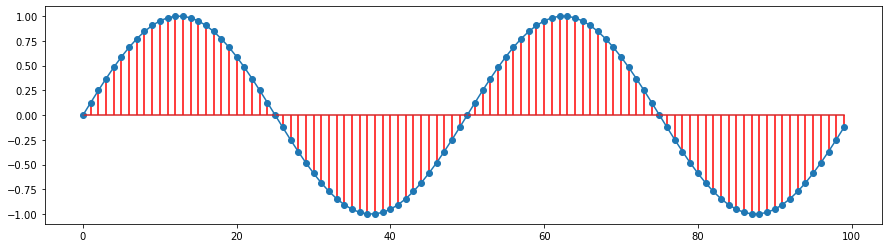

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fs = 100  # 표본 비율
f = 2  # 신호 빈도
x = np.arange(fs)  # plotting을 위한 x축 위의 점
y = [np.sin(2*np.pi*f*(i/fs)) for i in x]

%matplotlib inline
plt.figure(figsize=(15,4))
plt.stem(x,y,'r',)
plt.plot(x,y)

이런 데이터타입에서, 핵심적인 문제는 정보를 잃지 않고 단일 차원으로 데이터의 투영을 얻는 것이다. 이런 데이터타입이 latent space에서 투영되면, 많은 정보가 손실되고 원래 모양으로 투영하는 것은 거의 불가능하다. shift와 rotation이 아무리 많이 적용되어도 원본 데이터는 복구할 수 없다.

그렇다면 신경망은 이 문제를 어떻게 해결할까? 의도는, 매니폴드 공간에서, 심층신경망이 linear data fold view를 얻기 위해 공간을 구부리는 속성을 가지고 있는 것이다. autoencoder 구조는 latent view space에서 저차원 표현을 학습할 수 있게 이 속성을 은닉층에 적용한다. (참고 이미지는 맨 위 링크에서 찾아볼 것. 이해에 도움됨)

먼저 이미지에서 변수를 학습한 keras를 사용해 autoencoder를 실행하고, 출력과 동일한 이미지를 투사해보자.

# 2. Implementation

## 2.1. UseCase 1: Image Reconstruction

### 2.1.1. Load the required libraries

In [35]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

### 2.1.2. Dataset Preparation

데이터셋을 읽어오고, 예측변수와 타겟을 분리하고, 입력을 정규화한다.

In [21]:
# 데이터셋 읽기
train = pd.read_csv('../input/fashion-mnist_train.csv')
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

# 예측변수 정규화 및 형태 변경
train_x = train_x / 255

# train, validation 데이터셋 생성
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# 입력 형태 변경
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

### 2.1.3. Create Autoencoder architecture

autoencdoer 아키텍쳐를 생성한다. 인코딩 부분은 2000, 1200, 500개의 노드를 가진 세 개의 레이어로 구성된다. 인코딩 아키텍쳐는 10개의 노드로 구성된 latent view space에 연결되며, 이후 500, 1200, 2000개의 노드를 가진 디코딩 아키텍쳐에 연결된다. 마지막 레이어는 입력 레이어와 같은 정확한 노드의 수로 구성된다.

In [22]:
# input layer
input_layer = Input(shape=(784,))

# encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

# latent view
latent_view = Dense(500, activation='relu')(encode_layer3)

# decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

# output layer
output_layer = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              501000

다음으로, 조기멈춤 callback으로 모델을 학습시킨다.

In [24]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
### verbose : model.fit()의 진행과정을 표시
### verbose 0: 표시X   verbose 1: 진행바   verbose 2: epoch당 한 줄
### verbose 예시 사진 :https://github.com/keras-team/keras/issues/12860
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 20s 812ms/step - loss: 0.1538 - val_loss: 0.0658
Epoch 2/20
24/24 [==============================] - 20s 826ms/step - loss: 0.0611 - val_loss: 0.0441
Epoch 3/20
24/24 [==============================] - 20s 836ms/step - loss: 0.0420 - val_loss: 0.0368
Epoch 4/20
24/24 [==============================] - 23s 953ms/step - loss: 0.0360 - val_loss: 0.0319
Epoch 5/20
24/24 [==============================] - 33s 1s/step - loss: 0.0312 - val_loss: 0.0280
Epoch 6/20
24/24 [==============================] - 41s 2s/step - loss: 0.0275 - val_loss: 0.0254
Epoch 7/20
24/24 [==============================] - 28s 1s/step - loss: 0.0253 - val_loss: 0.0239
Epoch 8/20
24/24 [==============================] - 21s 893ms/step - loss: 0.0236 - val_loss: 0.0233
Epoch 9/20
24/24 [==============================] - 22s 921ms/step - loss: 0.0225 - val_loss: 0.0217
Epoch 10/20
24/24 [==============================] - 29s 1s/step - loss: 0.0214 - val_loss: 0.0206
E

validation 데이터로 예측을 생성해보자.

In [26]:
preds = model.predict(val_x)

원본 데이터와 예측된 데이터를 시각화해보자.

##### Inputs : Actual Images

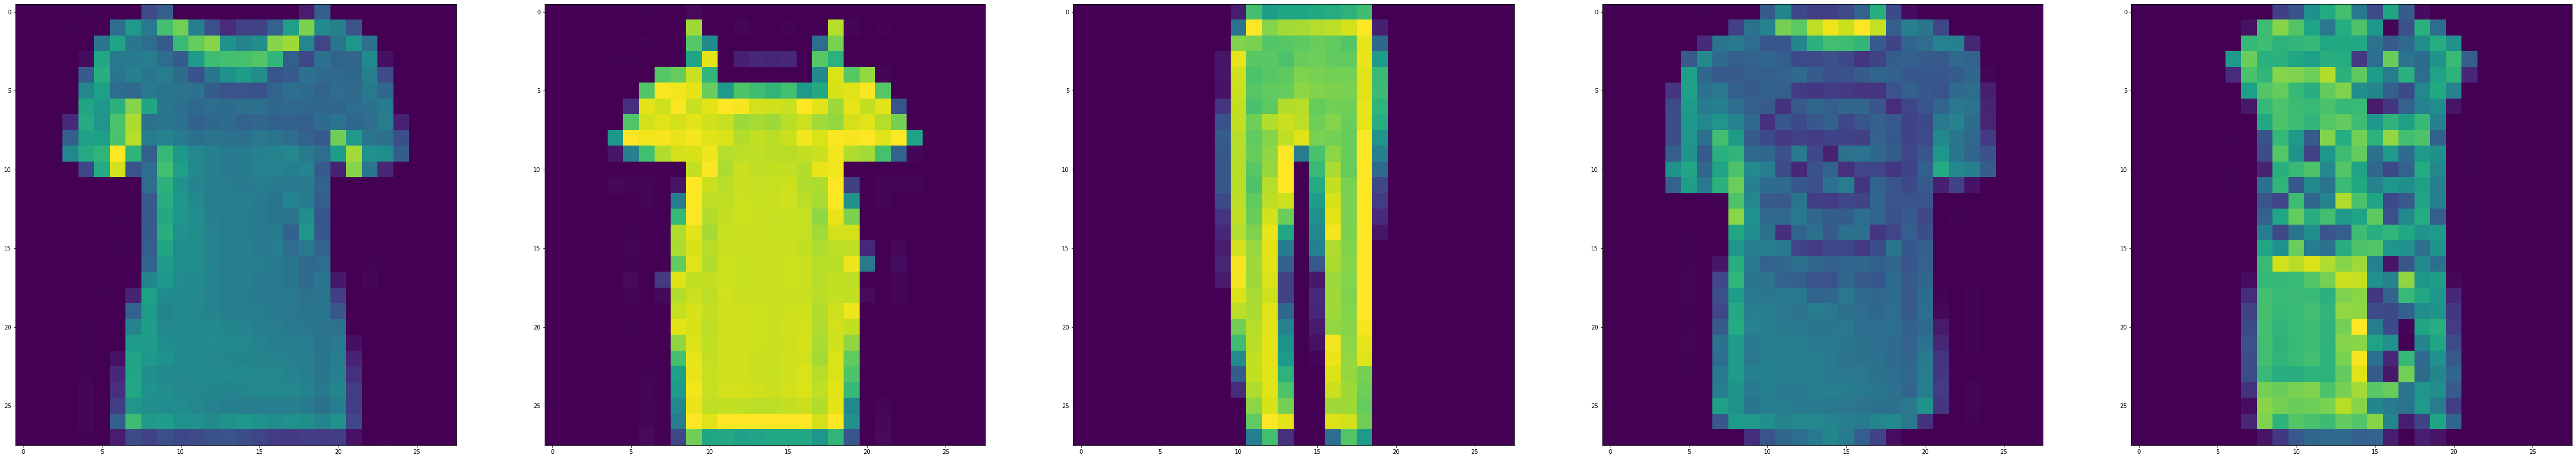

In [27]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28,28))
plt.show()

##### Predicted : Autoencdoer Output

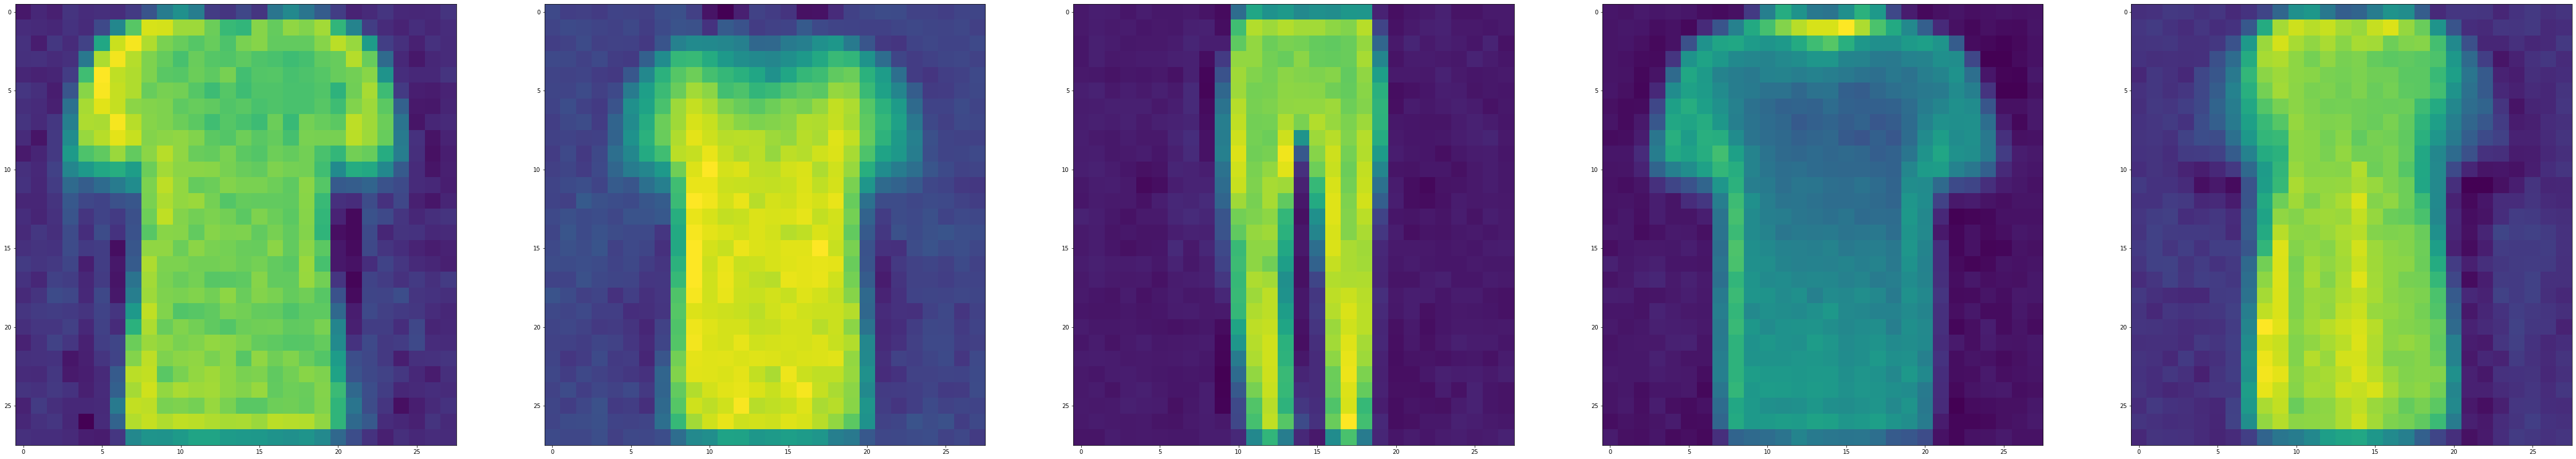

In [28]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28,28))
plt.show()

따라서 20 epochs으로 학습된 autoencoder가 입력 이미지를 아주 잘 재구성할 수 있다는 것을 볼 수 있다. autoencoder의 다른 사용 예시 - 이미지 denoising 혹은 이미지 노이즈 제거를 알아보자.

## 2.2. UseCase 2 : Image Denoising

autoencoder는 매우 유용하다. autoencoder의 또 다른 응용인 이미지 denoising을 알아보자. 입력 이미지는 데이터에 노이즈를 포함한 경우가 많으므로, autoencoder는 그러한 이미지를 제거하는 데 사용될 수 있다. 실제로 확인해보자. 먼저 이미지 픽셀을 포함하는 train_x와 val_x 데이터를 준비한다.

In [29]:
# train_x array와 val_x array 재생성
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# 정규화 및 모형 변경
train_x = train_x / 255.
val_x = val_x / 255.

이 autoencoder 네트워크에서, 컨볼루션 네트워크가 이미지 입력과 잘 작동하기 때문에 컨볼루션 레이어를 추가한다. 이미지 데이터에 컨볼루션을 적용하기 위해, 입력을 28*28 행렬 형태로 변환한다. 

In [30]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

### Noisy Images

이미지에 노이즈를 의도적으로 적용할 수 있다. imgaug 패키지를 사용해 다양한 변형으로 이미지를 증강시킬 수 있다. 그런 변형 중 하나는 노이즈 도입이다. 다양한 유형의 노이즈를 이미지에 추가할 수 있다. 
- Salt and Pepper Noise
- Gaussain Noise
- Periodic Noise
- Speckle Noise

데이터에 impulse noise라고도 불리는 salt and pepper noise를 추가해보자. 이 노이즈는 이미지 신호에 급격한 장애를 발생시킨다. 이는 자기 자신을 흑백 픽셀로 나타낸다.

In [31]:
# 샘플 노이즈를 추가해보자. - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x*255) / 255
val_x_n = seq_object.augment_images(val_x*255) / 255

노이즈 추가 이전

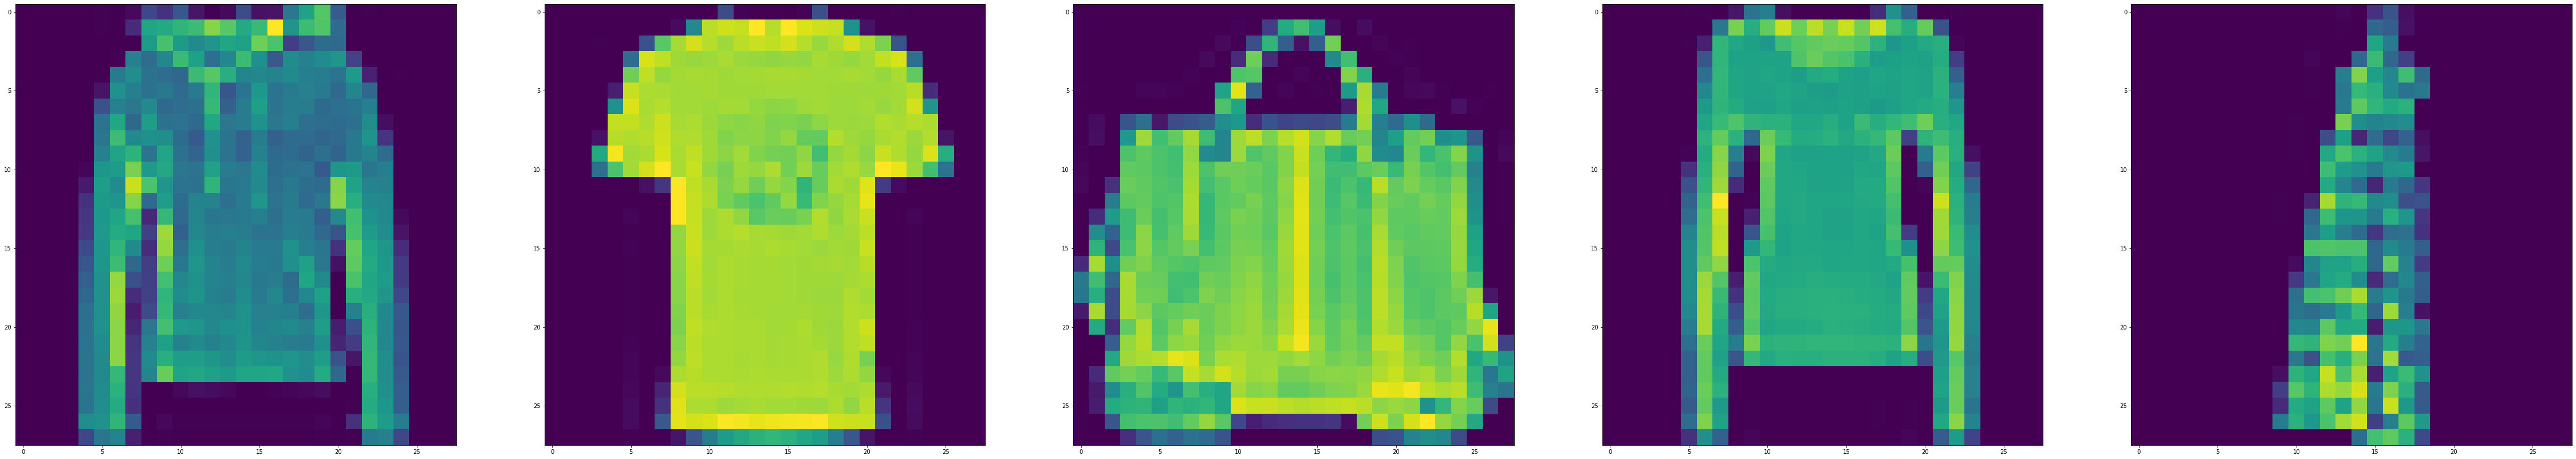

In [32]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5, 10):
    ax[i-5].imshow(train_x[i].reshape(28,28))
plt.show()

노이즈 추가 이후

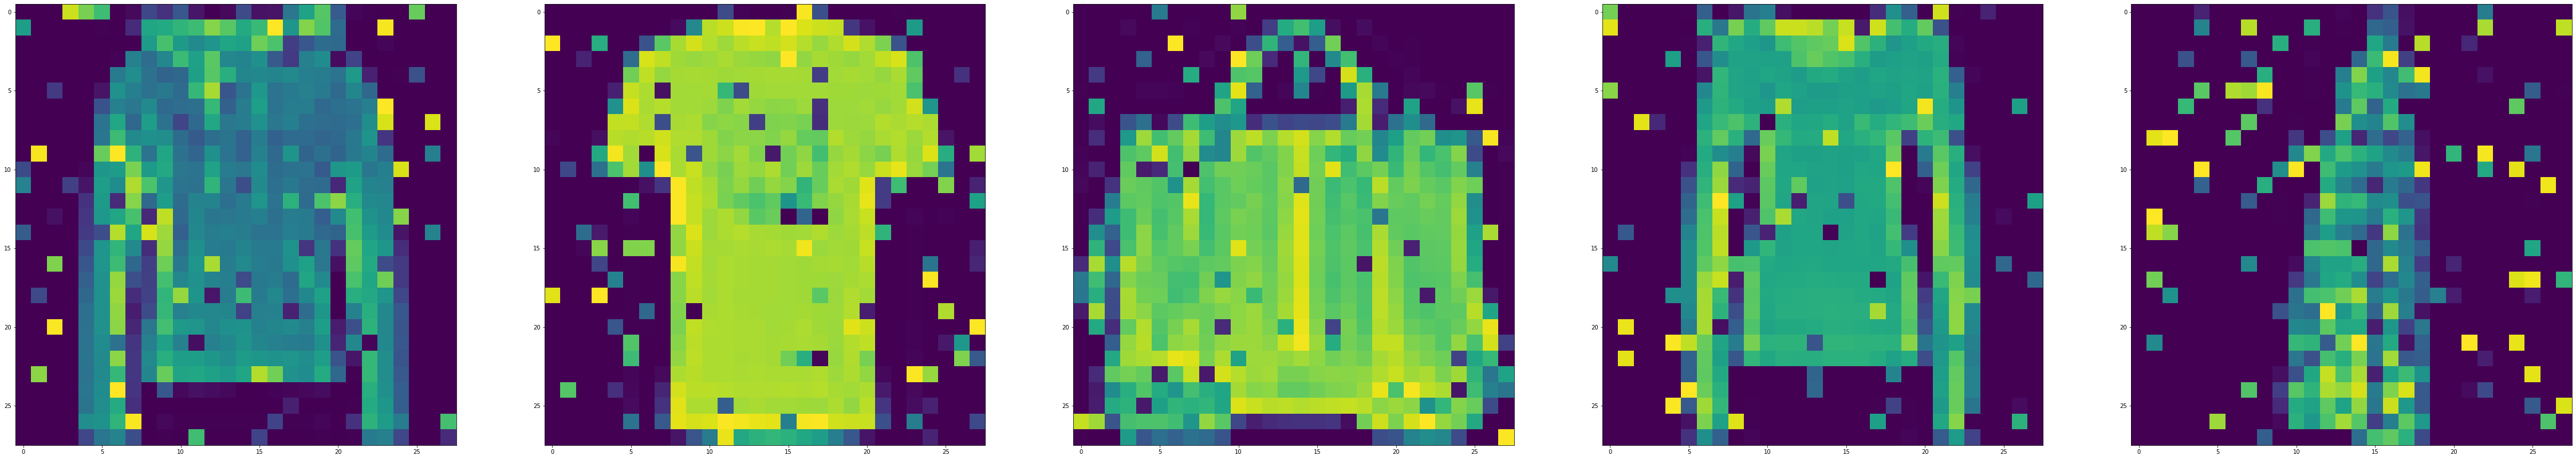

In [33]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28,28))
plt.show()

이제 autoencoder를 위한 모델 아키텍쳐를 생성해보자. 이 문제에 대해 어떤 유형의 네트워크를 생성해야하는지 파악한다.

- Encoding Architecture:

인코딩 아키텍쳐는 3개의 컨볼루션 레이어와 3개의 MaxPooling 레이어가 하나씩 쌓여 구성된다. Relu는 컨볼루션 레이어에서 활성화함수로 사용되고 패딩은 '같은' 상태로 유지된다. max pooling 레이어의 역할은 이미지의 차원을 축소하는 것이다. 이 레이어는 초기 표현의 겹치지 않는 하위 영역에 max 필터를 적용한다.

- Decoding Architecture:

디코딩 아키텍쳐에서도 마찬가지로, 컨볼루션 레이어는 인코딩 아키텍쳐와 동일한 차원(역방향 방식)을 갖는 데 사용된다. 하지만 3개의  maxpooling 레이어 대신, 3개의 업샘플링 레이어가 추가된다. 다시 활성화함수는 같고(relu), 컨볼루션 레이어의 패딩도 같다. 업샘플링 레이어의 역할은 입력 벡터의 차원을 더 높은 해상도 / 차원으로 업샘플링하는 것이다. max pooling 연산은 되돌릴 수 없지만, 각 풀링 영역 내의 maxima의 위치를 기록해 근사치를 얻을 수 있다. 업샘플링 레이어는 이 속성 사용해 저차원 특징 공간에서 재구성한다.

In [38]:
# input layer
input_layer = Input(shape=(28,28,1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D((2,2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3,3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D((2,2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3,3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D((2,2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3,3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2,2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3,3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2,2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3,3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2,2))(decoded_layer3)
output_layer = Conv2D(1, (3,3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [39]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0   

조기멈춤 callback으로 모델을 학습시킨다. 더 좋은 결과를 얻으려면 epoch 수를 늘린다.

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n,val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 182s 8s/step - loss: 0.1419 - val_loss: 0.0621
Epoch 2/10
24/24 [==============================] - 198s 8s/step - loss: 0.0544 - val_loss: 0.0405
Epoch 3/10
24/24 [==============================] - 200s 8s/step - loss: 0.0391 - val_loss: 0.0346
Epoch 4/10
24/24 [==============================] - 217s 9s/step - loss: 0.0338 - val_loss: 0.0311
Epoch 5/10
24/24 [==============================] - 193s 8s/step - loss: 0.0302 - val_loss: 0.0280
Epoch 6/10
24/24 [==============================] - 198s 8s/step - loss: 0.0274 - val_loss: 0.0257
Epoch 7/10
24/24 [==============================] - 211s 9s/step - loss: 0.0256 - val_loss: 0.0243
Epoch 8/10
24/24 [==============================] - 198s 8s/step - loss: 0.0242 - val_loss: 0.0233
Epoch 9/10
24/24 [==============================] - 203s 9s/step - loss: 0.0235 - val_loss: 0.0224
Epoch 10/10
24/24 [==============================] - 206s 9s/step - loss: 0.0224 - val_loss: 0.0219


모델로 예측해보자.

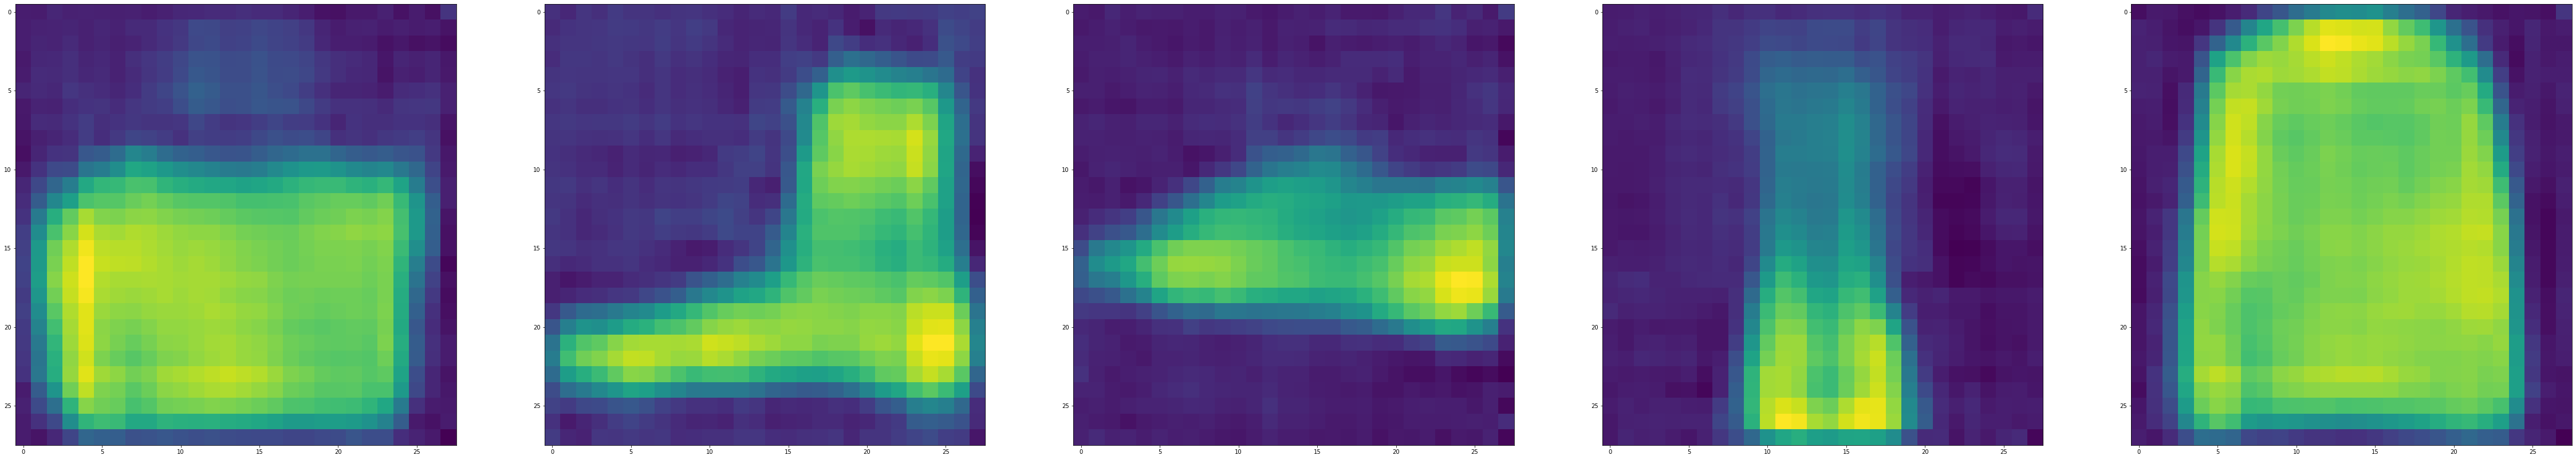

In [43]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

이 실행에서, 더 긴 epochs로 네트워크를 학습시키진 않았지만, 더 나은 예측을 위해 500~1000 범위 정도의 epochs로 네트워크를 학습시킬 수 있다.

## 2.3. UseCase 3 : Sequence to Sequence Prediction using AutoEncoders

다음 사용 예제는 sequence to sequence 예측이다. 이전 예시에서 기본적으로 2차우너 데이터인 이미지를 입력했지만, 이 예제에서 시퀀스 데이터를 1차원으로 입력한다. 시퀀스 데이터의 예는 시계열 데이터와 텍스트 데이터가 있다. 이 사용 예시는 기계 번역에 적용할 수 있다. 이미지 예시에서 CNN과 달리, 이 사용 예시에서는 LSTM을 사용한다.

##### Autoencdoer Architecture

이 사용예시의 아키텍쳐는 소스 시퀀스를 인코딩하는 인코더와, 다음으로 인코딩된 소스 시퀀스를 타겟 시퀀스로 디코딩하는 디코더를 포함한다. 먼저 이 아키텍쳐에서 사용될 LSTM의 내부 작업을 이해한다.
- LSTM(Long Short-Term Memory)은 내부 게이트로 구성된 반복 신경망이다. 
- 다른 반복 신경망과 달리, 네트워크의 내부 게이트는 BPTT(역전파)를 사용해 모델을 성공적으로 학습시키고, 가중치가 사라지는 문제를 피할 수 있게 한다. 
- LSTM 레이어에서 LSTM 메모리 유닛의 수를 정의할 수 있다. 레이어 내의 각 유닛 혹은 셀은 내부 메모리/셀 상태 'c'를 가지며, 은닉상태 'h'를 출력한다.
- keras를 사용해 LSTM 레이어의 현재 상태뿐만 아니라 LSTM의 출력 상태에 모두 접근할 수 있다.

이제 LSTM 레이어로 구성된 시퀀스를 학습하고 생성하기 위한 autoencoder 아키텍쳐를 생성해보자. 두 가지 구성요소가 있다.
- 시퀀스를 입력으로 하고 LSTM의 현재 상태를 출력으로 반환하는 인코더 아키텍쳐
- 시퀀스와 인코더 LSTM 상태를 입력으로 하고 디코딩된 출력 시퀀스를 반환하는 디코더 아키텍쳐
- 보이지 않는 데이터에 대한 예측을 생성할 때 LSTM을 사용할 수 있도록 은닉과 메모리 상태를 저장하고 액세스한다.

먼저 고정된 길이의 랜덤 시퀀스를 포함하는 시퀀스 데이터셋을 생성하자. 랜덤시퀀스를 생성하는 함수를 만든다.
- X1 : 난수를 포함하는 입력 시퀀스
- X2 : 시퀀스의 다른 요소를 재현하기 위해 seed로 사용되는 패딩 시퀀스
- y : 타겟 시퀀스 혹은 실제 시퀀스

In [46]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        # 난수 시퀀스 생성 - input
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        # 타켓 시퀀스 생성
        target = inp_seq[:n_out]
        # 패딩 시퀀스 / 시드 시퀀스 생성
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]
        
        # keras api를 이용해 범주화
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
        
    # 불필요한 차원 제거
    X1 = np.squeeze(np.array(X1), axis=1)  ### np.squeeze : 1차원 제거 (기본값이 1). 즉 차원축소에 사용됨
    X2 = np.squeeze(np.array(X2), axis=1)  ### (5,3,1)이면 (5,3)으로 / (4,1,1,5)면 (4,5)로 축소
    y = np.squeeze(np.array(y), axis=1)
    
    return X1, X2, y

samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print('Shapes :', inputs.shape, seeds.shape, outputs.shape)
print('Here is first categorically encoded input sequence loos like :',)
inputs[0][0]

Shapes : (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence loos like :


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

다음으로 keras에서 모델의 아키텍쳐를 생성해보자.

In [48]:
def define_models(n_input, n_output):
    # 인코더 아키텍쳐 정의
    # input : 시퀀스
    # output : 인코더 상태
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    
    # 인코더-디코더 아키텍쳐 정의
    # input : 시드 시퀀스
    # output : 디코더 상태, 디코딩된 output
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # 디코더 모델 정의
    # input : 현재 상태 + 인코딩된 시퀀스
    # output : 디코딩된 시퀀스
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    
    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [49]:
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None, 51)]        0         
_________________________________________________________________
lstm_2 (LSTM)                [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [50]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 128),  92160       input_9[0][0]                    
                                                                 input_10[0][0]             

In [51]:
autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 128), (None, 92160       input_8[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 128),  92160       input_9[0][0]                    
                                                                 lstm_2[0][1]               

이제 Adam Optimizer와 Categorical Cross Entropy 손실 함수를 사용해 autoencoder 모델을 학습시켜보자.

In [52]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

3125/3125 [==============================] - 27s 8ms/step - loss: 1.4426 - acc: 0.5544


입력 시퀀스를 기준으로 시퀀스를 예측하는 함수를 작성해보자.

In [54]:
def reverse_onehot(encoded_seq):
    return [argmax(vertor) for vertor in encoded_seq]


def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1,1,features)
    
    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0,0,:])
        current_state = [h, c]
        target_seq = pred
    
    return np.array(output)

예측을 생성한다.

In [55]:
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s,  SeedSequence=%s,  PredictedSequence=%s'
         %(reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))


Input Sequence=[37, 21, 21, 18, 26, 43],  SeedSequence=[21, 21, 37],  PredictedSequence=[21, 21, 37]

Input Sequence=[47, 43, 39, 26, 15, 46],  SeedSequence=[39, 43, 47],  PredictedSequence=[39, 43, 47]

Input Sequence=[48, 8, 35, 16, 34, 4],  SeedSequence=[35, 8, 48],  PredictedSequence=[35, 8, 48]

Input Sequence=[21, 15, 16, 9, 49, 2],  SeedSequence=[16, 15, 21],  PredictedSequence=[16, 15, 21]

Input Sequence=[47, 27, 19, 11, 31, 43],  SeedSequence=[19, 27, 47],  PredictedSequence=[19, 27, 47]
